# DATA 311 Lab 2
## Alex Isbill

## Part 1
>### 1. Determine which of the provided citites was the rainiest in 2020

### Approach:
1. Loop through each of the provided cities and pull the csv files to create dataframes for each.
2. Calculate the total amount of rain by filtering for daily observations in 2020 (data cleaning described in comments) and finding the sum of precipitation for each city.
3. Put results into a dataframe and compare the total precipitation in 2020 by city.
4. Calculate the number of days that had rain (not counting trace amounts) in the year for each city.
5. Put results into a dataframe and compare total rainy days in 2020 by city.
6. Look for similarities in the cities to determine if there is a clear rainiest city by the two metrics.

In [41]:
import pandas as pd
pd.options.mode.chained_assignment = None

# Using function from lecture to get csv at url of city
def data_url(city_name):
    base_url = "https://facultyweb.cs.wwu.edu/~wehrwes/courses/csci141_21s/fp/data/"
    return base_url + city_name + ".csv"

cities = ["AZ_Phoenix", "CA_LosAngeles", "CA_SanFrancisco","CO_Denver","FL_Jacksonville","GA_Atlanta","IL_Chicago","MA_Boston",
          "MN_MinneapolisStPaul","NY_Ithaca","NY_NewYorkJFK","OR_Portland","PA_Philadelphia","TX_DallasFtWorth",
          "UT_SaltLake","VA_WashingtonDulles","WA_Bellingham","WA_Seattle"]

# return dataframe of specified city
def get_df(city):
    return pd.read_csv(data_url(city), low_memory=False)

# Create a dictionary with the name of the city corresponding to its dataframe
dataframes = {}
for i in range(len(cities)):
    dataframes[cities[i]] = get_df(cities[i])


### Gathering Precipitation Totals for Each City
* Create a dictionary to store precipitation totals.
* Loop through the keys, accessing the dataframe for each city:
    * Create a mask to filter for "Summary of Day" Reports
    * Replace trace amounts with 0.0
    * Strip trailling "s" that appears
    * Sum the daily reports to find the yearly precipitation
* Ithaca, NY had no DailyPrecipitation reported so the same process was repeated with hourly reports.
* Data was cross checked with weather.gov 2020 annual climate survey for accuracy (https://www.weather.gov/ffc/2020AnnualClimateSummary).

### Gathering Number of Rainy Days for Each City
* Create a dictionary to store the rainy day totals.
* Loop through the keys, accesing the dataframe for each city:
    * Create a mask to filter for daily reports with precipitation greater than 0.0
    * Take the count of those reports to get the number of rainy days
    * Add the data to the dictionary with key of city
* For Ithaca, we create a mask to find hours with precipitation greater than 0.0
    * Take the dates on these reports and normalize them so they all have the same time
    * Find the number of unique days with precipitation greater than 0.0 and take the count
    * Add value to dictionary

In [42]:
precipTotals = {}
rainDays = {}
for key in dataframes:
    # Data cleaning - getting DailyPrecipitation column and replacing "T" with "0.0", removing "s", and changing values to float
    relevant = dataframes[key][["DATE","REPORT_TYPE","DailyPrecipitation"]]
    mask = relevant["REPORT_TYPE"].str.contains("SOD")
    precip = relevant[mask]
    precip = precip["DailyPrecipitation"].astype(str).str.replace("T","0.0").str.rstrip("s")
    precip = precip.astype(float)
    
    #Calculate number of rainy days (days with greater than 0.0 inches of rain)
    mask = precip > 0.0
    rainyDays = precip[mask]
    totRainyDays = rainyDays.count()
    
    #Get sum of daily precipitation, add values to dictionary
    total = precip.astype(float).sum()
    rainDays[key] = totRainyDays
    precipTotals[key] = total

In [43]:
# Same data cleaning process for Ithaca Data
relevant = dataframes["NY_Ithaca"][["DATE","REPORT_TYPE","HourlyPrecipitation"]]
mask = relevant["REPORT_TYPE"].str.contains("FM-15")
precipNY = relevant[mask]
precipNY["HourlyPrecipitation"] = precipNY["HourlyPrecipitation"].astype(str).str.replace("T","0.0").str.rstrip("s")

#Find the number of rainy hours, convert to datetime, find the number of unique days with rain
mask = precipNY["HourlyPrecipitation"].astype(float) > 0.0
rainHours = precipNY[mask]
rainHours["DATE"] = pd.to_datetime(rainHours["DATE"])
rainDaysNY = rainHours["DATE"].dt.normalize().unique()

#Put values into dictionary
rainDays["NY_Ithaca"] = len(rainDaysNY)
total = precipNY["HourlyPrecipitation"].astype(float).sum()
precipTotals["NY_Ithaca"] = total

### Method for determining which city was the rainiest in 2020
* After graphing the total precipitation and rainy days, there is no clear winner for both categories.
* To determine which is a winner as a function of both factors, we will rank the cities first by which had the most rainy days and then by which had the most precipitation. 
    * A low rank corresponds to more precipitation or rainy days. 
        * For example, Bellingham, WA would recieve a rainy days rank of 1 because it had the most precipitation and a precipitation rank of 6 because it had the 6th most total precipitation.
    * Then we combine the ranks to get an overall rank based on precipitation and rainy days.
    * The city with the lowest rank is named the rainiest city in 2020 out of the cities in the dataset.

,City,Rainy Days,Days Rank,Total Precipitation (in.),Precipitation Rank,Overall Rank
4,GA_Atlanta,138,5,66.99,1,6
0,WA_Bellingham,172,1,41.36,6,7
1,WA_Seattle,168,2,41.32,7,9
7,FL_Jacksonville,128,8,56.96,2,10
5,VA_WashingtonDulles,134,6,49.47,4,10
8,PA_Philadelphia,125,9,49.76,3,12
2,NY_Ithaca,159,3,32.68,11,14
6,NY_NewYorkJFK,133,7,40.89,8,15
3,OR_Portland,154,4,32.44,12,16
12,TX_DallasFtWorth,94,13,43.70,5,18


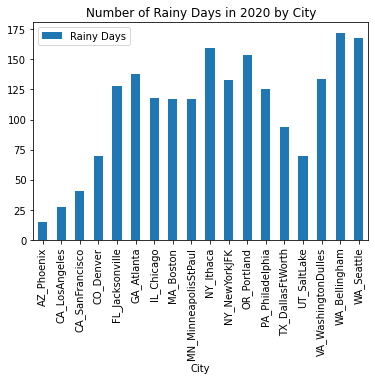

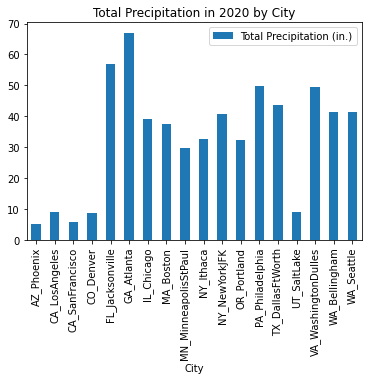

In [44]:
#Store the rainy days data in a data frame, sort for cities with the most rainy days first
rainDaysDF = pd.DataFrame.from_dict(rainDays, orient='index', columns = ["Rainy Days"])
rainDaysDF.index.name = "City"
rainDaysDF.reset_index(inplace=True)
rainDaysDF.plot.bar(title = "Number of Rainy Days in 2020 by City", x="City")
rainDaysDF =rainDaysDF.sort_values(by= "Rainy Days", ascending = False)
rankRain = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
rainDaysDF["Days Rank"] = rankRain

#Store the total precipitation data in a data frame, sort for cities with the most precipitation first
precip2020 = pd.DataFrame.from_dict(precipTotals, orient='index', columns = ["Total Precipitation (in.)"])
precip2020.index.name = "City"
precip2020.reset_index(inplace=True)
precip2020.plot.bar(title = "Total Precipitation in 2020 by City", x="City")
precip2020 = precip2020.sort_values(by="Total Precipitation (in.)", ascending= False)
precip2020["Precipitation Rank"] = rankRain

# Merge the two dataframes and add the ranks for precipitation and rainy days to get the overall rank
# Sort to get the city with the lowest combined rank
merged = pd.merge(rainDaysDF, precip2020, on = "City")
ovr_rank = merged["Days Rank"] + merged["Precipitation Rank"]
merged["Overall Rank"] = ovr_rank
merged = merged.sort_values(by="Overall Rank")
merged

# The rainiest city in 2020 was Atlanta, GA
* This is determined by its overall rank (ranking process described above).
* Atlanta had 138 rainy days and 66.99 inches of precipitation in 2020.
* The least rainy city was Pheonix, AZ.
* Bellingham had the most rainy days of any city but only had the 6th most precipitation.